IMPORT LIBRARIES

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

LOAD DATASET

In [3]:
df = pd.read_csv(r"C:\Users\hi\Desktop\python_project\Thyroid_Diff.csv")
df.shape

(383, 17)

TOP 5 ROWS

In [5]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


DATA PROFILING

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [20]:
df.describe(include=object)

,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
count,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383
unique,2,2,2,2,5,5,6,4,2,3,7,3,2,5,4,2
top,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
freq,312,334,355,376,332,140,277,287,247,249,151,268,365,333,208,275


In [8]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


CHECKING NULL VALUES

In [19]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
Age_Above_60            0
dtype: int64

TARGET VARIABLE IN THYROID DATASET AND COUNT

In [10]:
print(df['Recurred'].value_counts())

Recurred
No     275
Yes    108
Name: count, dtype: int64


In [11]:
# Proportion of each class in 'Recurred'
recurred_proportions = df['Recurred'].value_counts(normalize=True)
print(recurred_proportions)

Recurred
No     0.718016
Yes    0.281984
Name: proportion, dtype: float64


UNIVARIENT ANALYSIS

c:\Users\hi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


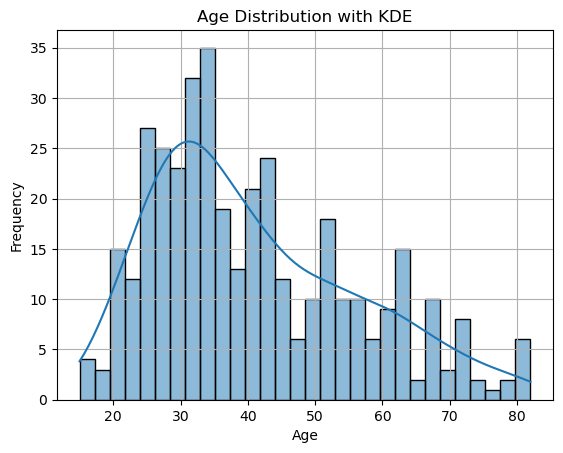

In [34]:
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution with KDE')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


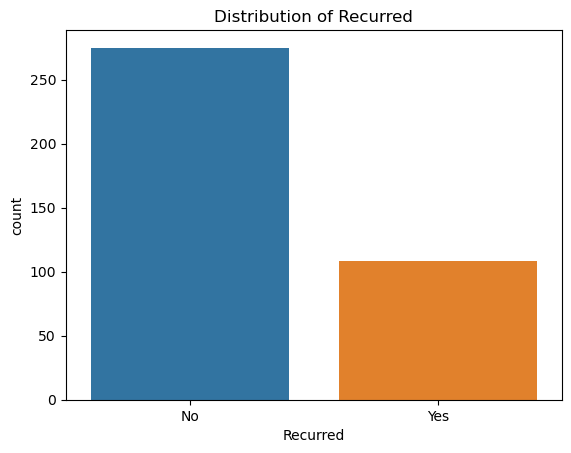

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of the 'Recurred' variable
sns.countplot(x='Recurred', data=df)
plt.title('Distribution of Recurred')
plt.show()

BIVARIENT ANALYSIS

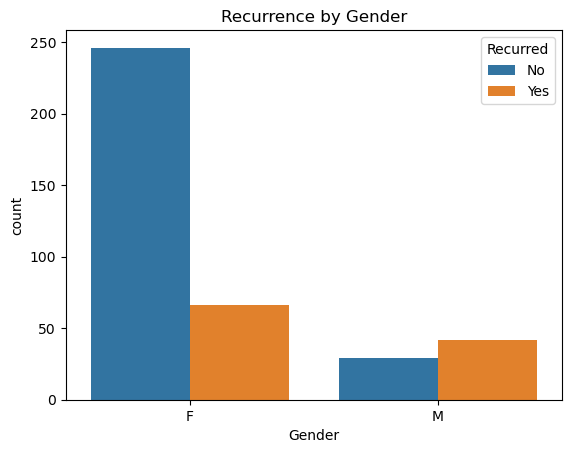

In [13]:
# Example: Compare 'Gender' with 'Recurred'
sns.countplot(x='Gender', hue='Recurred', data=df)
plt.title('Recurrence by Gender')
plt.show()

c:\Users\hi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


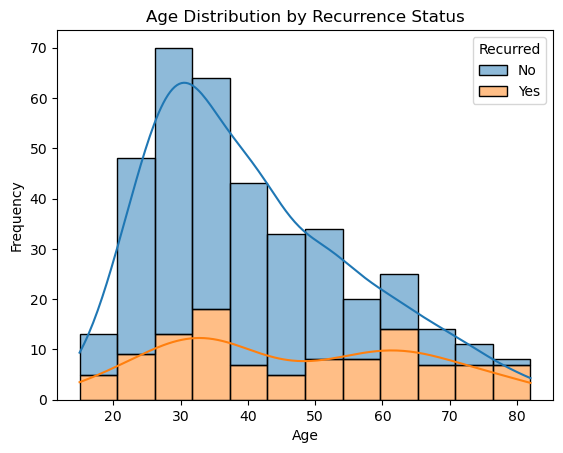

In [28]:
sns.histplot(data=df, x='Age', hue='Recurred', kde=True, multiple='stack')
plt.title('Age Distribution by Recurrence Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

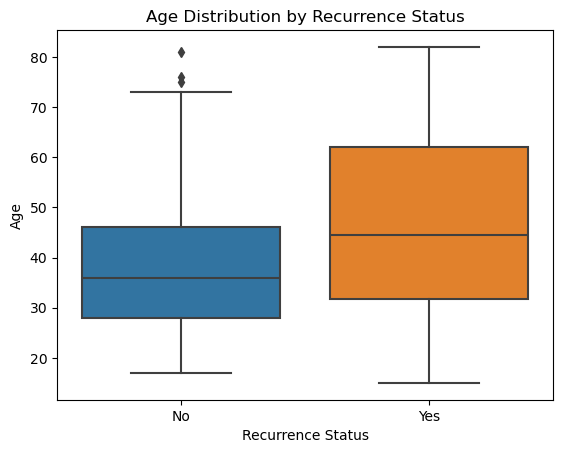

In [23]:
# Boxplot of Age by Recurrence Status
sns.boxplot(x='Recurred', y='Age', data=df)
plt.title('Age Distribution by Recurrence Status')
plt.xlabel('Recurrence Status')
plt.ylabel('Age')
plt.show()


In [24]:
# Summary statistics for Age by Recurred status
age_stats = df.groupby('Recurred')['Age'].describe()
print(age_stats)

          count       mean        std   min    25%   50%   75%   max
Recurred                                                            
No        275.0  38.414545  12.946654  17.0  28.00  36.0  46.0  81.0
Yes       108.0  47.111111  18.267654  15.0  31.75  44.5  62.0  82.0


CORRELATION ANALYSIS

In [14]:
# Convert categorical features to numerical for correlation analysis
df_encoded = pd.get_dummies(df, drop_first=True)

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Extract correlation with 'Recurred_Yes' (assuming 'Recurred' was encoded to 'Recurred_Yes')
print(correlation_matrix['Recurred_Yes'])

Age                                                 0.258897
Gender_M                                            0.328189
Smoking_Yes                                         0.333243
Hx Smoking_Yes                                      0.136073
Hx Radiothreapy_Yes                                 0.174407
Thyroid Function_Clinical Hypothyroidism           -0.046091
Thyroid Function_Euthyroid                          0.074827
Thyroid Function_Subclinical Hyperthyroidism       -0.072075
Thyroid Function_Subclinical Hypothyroidism         0.032535
Physical Examination_Multinodular goiter            0.150881
Physical Examination_Normal                         0.001131
Physical Examination_Single nodular goiter-left     0.012412
Physical Examination_Single nodular goiter-right   -0.138297
Adenopathy_Extensive                                0.217726
Adenopathy_Left                                     0.203033
Adenopathy_No                                      -0.623965
Adenopathy_Posterior    

EXPLORATORY DATA ANALYSIS

In [15]:
from scipy.stats import chi2_contingency

# Example: Chi-Square test for 'Gender' and 'Recurred'
contingency_table = pd.crosstab(df['Gender'], df['Recurred'])
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2 Stat: {chi2_stat}, P-value: {p_val}")

Chi2 Stat: 39.396676469993665, P-value: 3.4588517738589313e-10


In [16]:
from scipy.stats import ttest_ind

# Example: T-Test for 'Age' between 'Recurred' Yes and No
age_yes = df[df['Recurred'] == 'Yes']['Age']
age_no = df[df['Recurred'] == 'No']['Age']
t_stat, p_val = ttest_ind(age_yes, age_no)
print(f"T-Stat: {t_stat}, P-value: {p_val}")


T-Stat: 5.231848270982386, P-value: 2.7765407961641836e-07


In [17]:
# Example: Create a new feature indicating if 'Age' is above a certain threshold
df['Age_Above_60'] = df['Age'] > 60


FOREST CLASSIFIER MODEL

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Prepare the data
X = df_encoded.drop('Recurred_Yes', axis=1)
y = df_encoded['Recurred_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98        83
        True       0.91      0.97      0.94        32

    accuracy                           0.97       115
   macro avg       0.95      0.97      0.96       115
weighted avg       0.97      0.97      0.97       115

